In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
X_train.shape
X_test.shape
single_image= X_train[0]
single_image.shape

(28, 28)

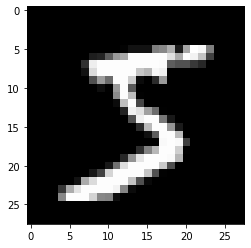

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
X_train.min()
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()
X_train_scaled.max()

1.0

In [ ]:
y_train[0]
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)
y_train_onehot.shape
single_image = X_train[500]

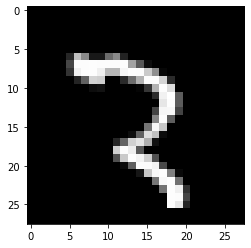

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add (layers. Input (shape=(28,28,1)))
model.add (layers.Conv2D (filters=32, kernel_size=(3,3), activation='relu')) 
model.add (layers.MaxPool2D (pool_size=(2,2)))
model.add (layers. Flatten())
model.add (layers.Dense (32, activation='relu'))
model.add (layers.Dense (10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                173088    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 37s 38ms/step - loss: 0.2350 - accuracy: 0.9314 - val_loss: 0.0914 - val_accuracy: 0.9724
Epoch 2/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0790 - accuracy: 0.9770 - val_loss: 0.0678 - val_accuracy: 0.9784
Epoch 3/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0573 - accuracy: 0.9830 - val_loss: 0.0554 - val_accuracy: 0.9817
Epoch 4/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0453 - accuracy: 0.9865 - val_loss: 0.0577 - val_accuracy: 0.9820
Epoch 5/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0488 - val_accuracy: 0.9856


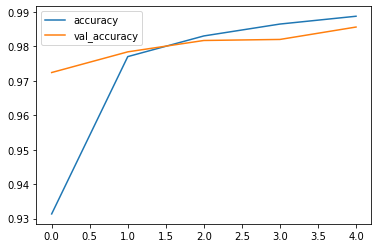

In [ ]:
metrics = pd.DataFrame(model.history.history)
metrics.head()
metrics[['accuracy','val_accuracy']].plot()

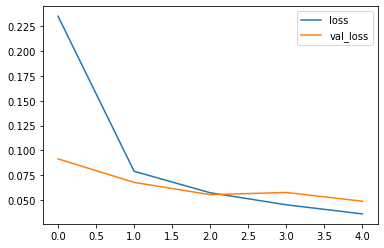

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))

[[ 975    0    0    1    0    0    2    0    1    1]
 [   0 1129    4    0    1    0    0    1    0    0]
 [   2    1 1017    3    2    0    0    5    1    1]
 [   1    0    3  998    0    1    0    2    5    0]
 [   0    0    0    0  972    0    4    1    0    5]
 [   1    0    1    9    0  874    3    0    2    2]
 [   5    3    0    1    4    2  937    0    6    0]
 [   0    1    5    1    0    0    0 1018    1    2]
 [   7    0    3    1    2    1    1    3  948    8]
 [   1    2    0    5    9    0    0    4    0  988]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
## Prediction for a single input
from google.colab import files
uploaded=files.upload()


Saving img0.jpg to img0.jpg


In [ ]:
img = image.load_img('img0.jpg')
type(img)
img = image.load_img('img0.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [51]:
print(x_single_prediction)


[9]


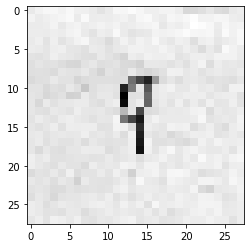

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
img_28_gray_inverted = 255.0-img_28_gray

In [52]:
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0



In [53]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

In [54]:
print(x_single_prediction)

[9]
